In [5]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

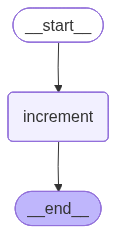

Adding 1 to 0 => 1
Final state: {'number': 1}


In [6]:
from langgraph.graph import StateGraph, END
from typing import TypedDict

# 1. 상태 정의
class State(TypedDict):
    number: int

# 2. 상태 업데이트 함수 (노드)
def add_one(state: State) -> State:
    new_number = state["number"] + 1
    print(f"Adding 1 to {state['number']} => {new_number}")
    return {"number": new_number}

# 3. 그래프 정의
builder = StateGraph(State)

# 노드 등록
builder.add_node("increment", add_one)

# 노드 연결
builder.set_entry_point("increment")     # 시작 지점
builder.set_finish_point("increment")    # 종료 지점

# 4. 그래프 빌드
graph = builder.compile()
graph


# 5. 실행
initial_state = {"number": 0}
final_state = graph.invoke(initial_state)

print("Final state:", final_state)
